## Baseline RF Test Results

In [3]:
import sys
import torch
import pandas as pd
import importlib as imp
from joblib import dump, load

# Import ml libraries
# sys.path.append('/export/sec02/fatih/Common')
# from ml import clf
# from ml import dnn
# from ml import score
import clf,dnn,score
from tqdm import trange

imp.reload(clf)
imp.reload(dnn)
DNN = dnn.Classifier

/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'clf'

In [24]:
# Data preparation

normalized_mal = pd.read_csv('normalized/domain/d1_mal.csv')
normalized_mal = normalized_mal[~normalized_mal.family.str.contains('vt_')]
# normalized_mal = normalized_mal[normalized_mal.family.str.contains('vt5')]
normalized_benign = pd.read_csv('normalized/domain/d1_benign.csv')
# normalized_benign = normalized_benign[normalized_benign.family.str.contains('alexa')]

print('Benign', len(normalized_benign), 'Malicious', len(normalized_mal))
feature_set = normalized_benign.columns[3:]

df = pd.concat([normalized_benign,normalized_mal], axis=0)
X = df[feature_set]
y = df['label']
X_train, X_test, y_train, y_test = clf.train_test_split( X, y, test_size = 0.2, random_state=22)

Benign 65964 Malicious 43228


Class: 0 Accuracy: 0.7938550299922158 Precision: 0.9078658490423196 Recall: 0.7849708712443543 FPR: 0.18546174946662602
Class: 1 Accuracy: 0.7938550299922158 Precision: 0.619351100811124 Recall: 0.8145382505333739 FPR: 0.21502912875564575


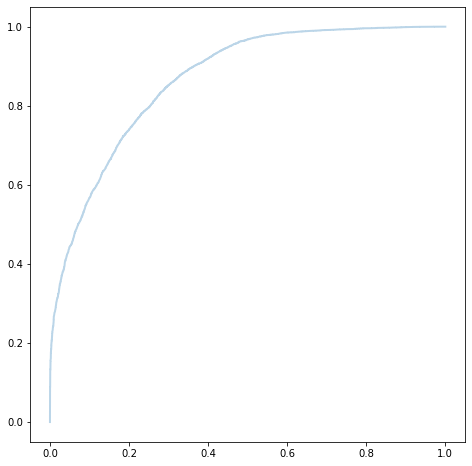

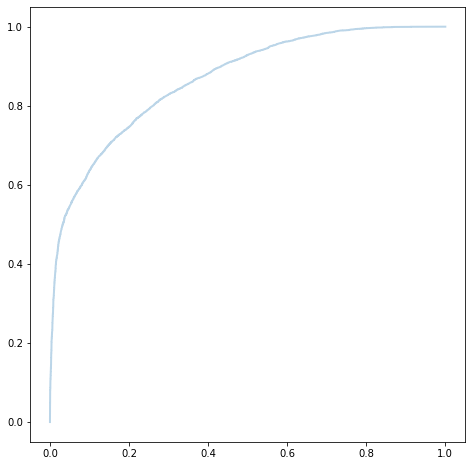

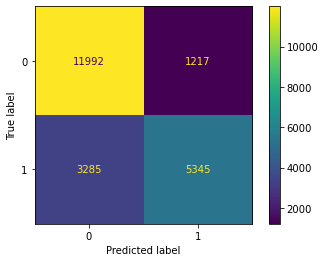

['selected/random_forest.joblib']

In [15]:
# RF 
model = clf.hyperparameter_tuning_random(X_train, y_train, 2)
clf.validation_run(model, X_train, y_train, 2)

clf.testing_run(model, X_test, y_test, feature_set)
dump(model, "selected/random_forest.joblib")

/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:15:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:15:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:15:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:15:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:15:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ab7a9bdc0>
Traceback (most recent call last):
  File "/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/local/QCRI/fdeniz/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

XGB: 0.794844 (0.001033)
RF: 0.770815 (0.002707)
SVC: 0.785674 (0.002578)
KNN: 0.751915 (0.002523)
DT: 0.747336 (0.003714)
NB: 0.542501 (0.044298)
LR: 0.777855 (0.001823)
LDA: 0.773505 (0.002166)


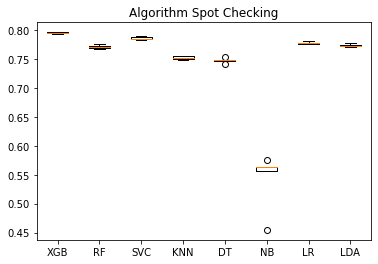

In [36]:
clf.spot_checking_classification(X_train, y_train)

## DNN

In [31]:

X_traint = torch.Tensor(X_train.values)
X_testt = torch.Tensor(X_test.values)
y_traint = torch.Tensor(y_train.values)
y_testt = torch.Tensor(y_test.values)

input_size = X_traint.shape[1]  

# placeholder, loaded from config
hidden_size = 64  
num_classes = 2  
num_layers = 5
learning_rate = 0.001
num_epochs = 100

model = DNN(input_size, hidden_size, num_classes, num_layers)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_epoch = trange(num_epochs)
for epoch in train_epoch:
    model.train()
    optimizer.zero_grad()
    pred = model(X_traint)
    loss = criterion(pred, y_traint.long())

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Print the loss for every epoch (optional)
    train_epoch.set_description(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.02f}")

# Evaluation
model.eval()
with torch.no_grad():
    # Predict the labels for test data
    test_pred = model(X_testt)
    _, predicted = torch.max(test_pred.data, 1)

    # Calculate the accuracy
    accuracy = score.score(predicted, y_testt)

    print(f"Test Accuracy: {accuracy}")


Epoch [100/100], Loss: 0.44: 100%|██████████| 100/100 [00:03<00:00, 28.69it/s]


Test Accuracy: {'acc': 0.7851092082970832, 'f1': 0.6952795273034219, 'auc': 0.7565593159690358, 'prec': 0.7907251513808891, 'recall': 0.6203939745075319, 'fpr': 0.10727534256946021}
